## Chapter 6 Data Visualization

In [148]:
import matplotlib as mpl
print(mpl.__version__)
print(mpl.__path__)

3.4.1
['/usr/local/lib/python3.7/site-packages/matplotlib']


In [149]:
import matplotlib.pyplot as plt

In [150]:
import numpy as np

In [6]:
x = np.linspace(0,20)

In [5]:
np.__version__

'1.20.2'

In [7]:
x

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

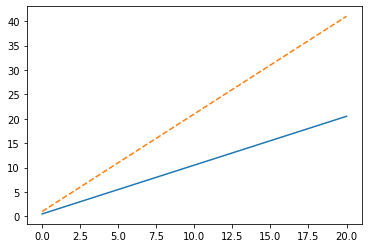

In [12]:
plt.plot(x,x+0.5)
plt.plot(x,1+2*x,'--')
plt.show()

### Log graphic plot

In [16]:
path ='/Users/alfeng/Documents/My_Training_A/data_analysis/3358OS_Code/3358OS_06_Code/code6/'


In [17]:
import pandas as pd

In [18]:
df = pd.read_csv(path+'transcount.csv')

In [19]:
df

,trans_count,year
0,2600000000,2011
1,4310000000,2014
2,1000000000,2010
3,5000000000,2012
4,1200000000,2012
...,...,...
76,785000,2012
77,5000000000,2009
78,8500,1983
79,5000000000,2013


In [22]:
df1 = df.groupby('year').aggregate(np.mean)

In [23]:
df1

,trans_count
year,
1971,2.300000e+03
1972,3.500000e+03
1974,4.533333e+03
1975,3.510000e+03
1976,7.500000e+03
1978,1.900000e+04
1979,4.850000e+04
1982,9.450000e+04
1983,8.500000e+03


In [24]:
years = df1.index.values

In [25]:
years

array([1971, 1972, 1974, 1975, 1976, 1978, 1979, 1982, 1983, 1984, 1985,
       1986, 1988, 1989, 1991, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014])

In [26]:
counts = df1['trans_count'].values

In [27]:
counts

array([2.30000000e+03, 3.50000000e+03, 4.53333333e+03, 3.51000000e+03,
       7.50000000e+03, 1.90000000e+04, 4.85000000e+04, 9.45000000e+04,
       8.50000000e+03, 2.00000000e+05, 1.05333333e+05, 2.50000000e+04,
       2.50000000e+05, 7.40117500e+05, 6.90000000e+05, 3.10000000e+06,
       5.78977000e+05, 5.50000000e+06, 4.30000000e+06, 8.15000000e+06,
       7.50000000e+06, 1.76000000e+07, 3.15000000e+07, 4.50000000e+07,
       1.37500000e+08, 1.90066667e+08, 3.52000000e+08, 1.69000000e+08,
       6.04000000e+08, 3.71600000e+08, 9.03200000e+08, 3.45000000e+09,
       1.51166667e+09, 1.73350000e+09, 2.01482643e+09, 5.00000000e+09,
       4.31000000e+09])

In [32]:
poly = np.polyfit(years,np.log(counts),deg=1)

In [33]:
poly

array([ 3.61559210e-01, -7.05783195e+02])

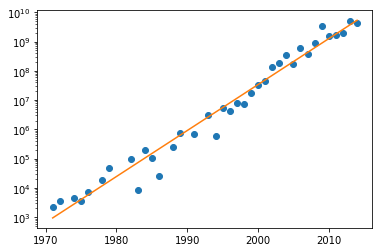

In [34]:
plt.semilogy(years,counts,'o')
plt.semilogy(years,np.exp(np.polyval(poly,years)))
plt.show()

### Scatter graph plot

In [36]:
gpu = pd.read_csv(path+'gpu_transcount.csv')

In [37]:
gpu1 = gpu.groupby('year').aggregate(np.mean)

In [38]:
df2 = pd.merge(df1,gpu1,how='outer',left_index=True, right_index=True)

In [39]:
df2 = df2.replace(np.nan,0)

In [40]:
df2

,trans_count,gpu_trans_count
year,,
1971,2.300000e+03,0.000000e+00
1972,3.500000e+03,0.000000e+00
1974,4.533333e+03,0.000000e+00
1975,3.510000e+03,0.000000e+00
1976,7.500000e+03,0.000000e+00
1978,1.900000e+04,0.000000e+00
1979,4.850000e+04,0.000000e+00
1982,9.450000e+04,0.000000e+00
1983,8.500000e+03,0.000000e+00


In [41]:
years

array([1971, 1972, 1974, 1975, 1976, 1978, 1979, 1982, 1983, 1984, 1985,
       1986, 1988, 1989, 1991, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014])

In [42]:
counts

array([2.30000000e+03, 3.50000000e+03, 4.53333333e+03, 3.51000000e+03,
       7.50000000e+03, 1.90000000e+04, 4.85000000e+04, 9.45000000e+04,
       8.50000000e+03, 2.00000000e+05, 1.05333333e+05, 2.50000000e+04,
       2.50000000e+05, 7.40117500e+05, 6.90000000e+05, 3.10000000e+06,
       5.78977000e+05, 5.50000000e+06, 4.30000000e+06, 8.15000000e+06,
       7.50000000e+06, 1.76000000e+07, 3.15000000e+07, 4.50000000e+07,
       1.37500000e+08, 1.90066667e+08, 3.52000000e+08, 1.69000000e+08,
       6.04000000e+08, 3.71600000e+08, 9.03200000e+08, 3.45000000e+09,
       1.51166667e+09, 1.73350000e+09, 2.01482643e+09, 5.00000000e+09,
       4.31000000e+09])

In [44]:
gpu_counts = df2['gpu_trans_count'].values

In [45]:
gpu_counts

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.50000000e+06,
       0.00000000e+00, 1.35000000e+07, 2.50000000e+07, 5.85000000e+07,
       8.50000000e+07, 1.26000000e+08, 1.91000000e+08, 3.12000000e+08,
       5.32500000e+08, 7.27000000e+08, 1.17950000e+09, 2.15400000e+09,
       2.94666667e+09, 4.31271187e+09, 5.31000000e+09, 6.30000000e+09,
       0.00000000e+00])

In [46]:
gpu_counts.max()

6300000000.0

In [47]:
cnt_log = np.log(counts)

    c menas color , s means size , alpha means transparent 

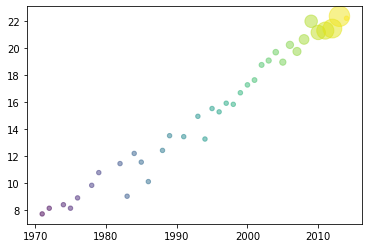

In [52]:
plt.scatter(years,cnt_log, c=200*years, s=20+400*gpu_counts/gpu_counts.max(), alpha = 0.5)
plt.show()

In [61]:
gpu_start = gpu1.index.values.min()

In [64]:
y_ann = np.log(df2.at[gpu_start,'trans_count'])
ann_str = "Fisrt GPU \n %d"%gpu_start

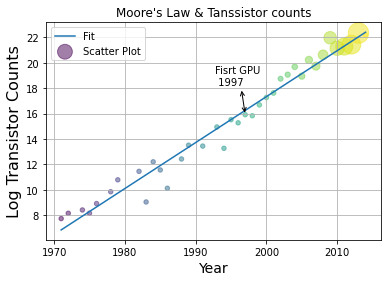

In [72]:
plt.plot(years,np.polyval(poly,years),label ='Fit')
plt.scatter(years,cnt_log, c=200*years, s=20+400*gpu_counts/gpu_counts.max(), alpha = 0.5,label ='Scatter Plot')
plt.grid()
plt.annotate(ann_str, xy=(gpu_start, y_ann), arrowprops=dict(arrowstyle="<->"), xytext= (-30,+30),textcoords = 'offset points')
plt.legend(loc='upper left') # description
plt.xlabel('Year', fontsize =14)
plt.ylabel('Log Transistor Counts', fontsize = 16)
plt.title("Moore's Law & Tanssistor counts")
plt.show()

### 3D Graph plot

In [147]:
%matplotlib inline

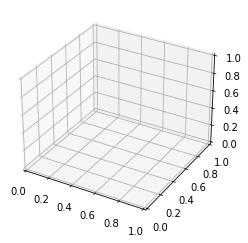

In [151]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

In [152]:
X = df2.index.values

In [153]:
Y = np.log([df2['trans_count'].values])
#X,Y = np.meshgrid(X,Y)

In [154]:
Z = np.log(df2['gpu_trans_count'].values)
Z1 = df2['gpu_trans_count'].values


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [163]:
ax.scatter(X.tolist(),Y[0].tolist(),Z1.tolist())

In [164]:
plt.show()

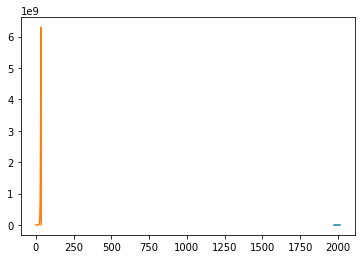

In [166]:
Y.tolist()
plt.plot(X.tolist(),Y[0].tolist(),Z1.tolist())

In [165]:
Z1.tolist()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3500000.0,
 0.0,
 13500000.0,
 25000000.0,
 58500000.0,
 85000000.0,
 126000000.0,
 191000000.0,
 312000000.0,
 532500000.0,
 727000000.0,
 1179500000.0,
 2154000000.0,
 2946666666.6666665,
 4312711873.0,
 5310000000.0,
 6300000000.0,
 0.0]

<AxesSubplot:xlabel='year'>

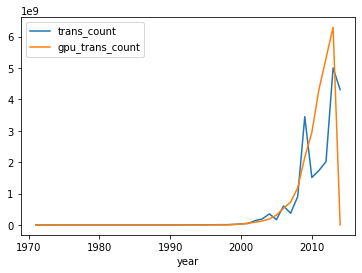

In [171]:
df2.plot()

<AxesSubplot:xlabel='year'>

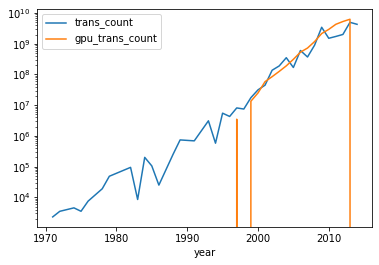

In [172]:
df2.plot(logy=True)